In [1]:
conda install lightgbm

Note: you may need to restart the kernel to use updated packages.

Solving environment: ...working... done

## Package Plan ##

  environment location: C:\Users\dhxog\anaconda3\envs\my

  added / updated specs:
    - lightgbm


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    ca-certificates-2020.7.22  |                0         125 KB
    lightgbm-2.3.0             |   py37ha925a31_0         488 KB
    openssl-1.1.1h             |       he774522_0         4.8 MB
    scikit-learn-0.23.2        |   py37h47e9c7a_0         4.6 MB
    threadpoolctl-2.1.0        |     pyh5ca1d4c_0          17 KB
    ------------------------------------------------------------
                                           Total:        10.1 MB

The following NEW packages will be INSTALLED:

  lightgbm           pkgs/main/win-64::lightgbm-2.3.0-py37ha925a31_0
  scikit-learn       pkgs/main/win-64::scikit-learn-0.23

In [2]:
import lightgbm as lgb
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import numpy as np
import pandas as pd
from sklearn.model_selection import cross_val_score


In [2]:
batter = pd.read_csv("./data/batter_feature_selection.csv")

In [3]:
batter = pd.get_dummies(batter,columns=["T_ID"])

In [4]:
batter.head()

,Unnamed: 0,year,month,P_ID,PA,BAT_ORDER,stadium_MH,stadium_MS,stadium_JS,stadium_SW,...,T_ID_HH,T_ID_HT,T_ID_KT,T_ID_LG,T_ID_LT,T_ID_NC,T_ID_OB,T_ID_SK,T_ID_SS,T_ID_WO
0,1,2016,4,60146,0,5.0,3,0,10,0,...,0,0,0,1,0,0,0,0,0,0
1,2,2016,4,60263,0,6.0,3,9,6,0,...,0,0,0,0,0,1,0,0,0,0
2,3,2016,4,60404,12,9.0,0,3,5,0,...,1,0,0,0,0,0,0,0,0,0
3,4,2016,4,60456,74,7.0,0,0,2,3,...,0,0,0,0,0,0,0,0,1,0
4,5,2016,4,60523,105,1.0,0,2,3,3,...,0,0,0,0,1,0,0,0,0,0


In [5]:
X = batter.drop(["XR","Unnamed: 0"], axis = 1)
Y = batter["XR"]

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=99)

In [6]:
X["T_ID_HH"] = X["T_ID_HH"].astype('category')
X["T_ID_HT"] = X["T_ID_HT"].astype('category')
X["T_ID_KT"] = X["T_ID_KT"].astype('category')
X["T_ID_LG"] = X["T_ID_LG"].astype('category')
X["T_ID_LT"] = X["T_ID_LT"].astype('category')
X["T_ID_NC"] = X["T_ID_NC"].astype('category')
X["T_ID_OB"] = X["T_ID_OB"].astype('category')
X["T_ID_SK"] = X["T_ID_SK"].astype('category')
X["T_ID_SS"] = X["T_ID_SS"].astype('category')
X["T_ID_WO"] = X["T_ID_WO"].astype('category')
X["P_ID"] = X["P_ID"].astype('category')
X["BAT_ORDER"] = X["BAT_ORDER"].astype('category')

# 타자 튜닝X

In [7]:
lgb_b =lgb.LGBMRegressor()

In [8]:
lgb_b.fit(X_train,Y_train)

LGBMRegressor()

In [9]:
Y_pred = lgb_b.predict(X_test)

In [20]:
print(mean_squared_error(Y_test, Y_pred))

0.16967107382905677


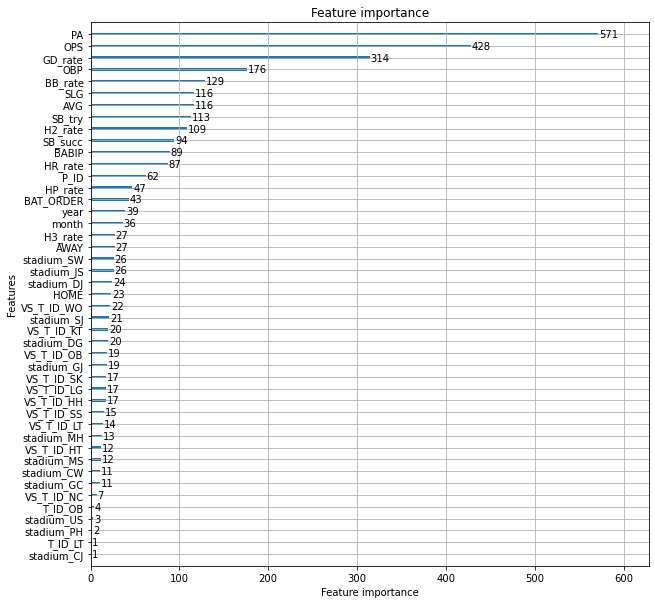

In [11]:
lgb_b_imp = lgb.plot_importance(lgb_b)
lgb_b_imp.figure.set_size_inches(10,10)

# 타자 튜닝

In [12]:
def LGBM_cv(max_depth,learning_rate,n_estimators):
    model = lgb.LGBMRegressor(max_depth=int(max_depth),
                            learning_rate=learning_rate,
                            n_estimators=int(n_estimators),
                             )
    NMSE = cross_val_score(model, X_train, Y_train, scoring='neg_mean_squared_error', cv=5).mean()
    return NMSE

In [13]:
pbounds = {'max_depth': (2, 15),
          'learning_rate': (0.001, 0.2),
          'n_estimators' :(50,3000),
          }

In [14]:
from bayes_opt import BayesianOptimization
lgbmBO = BayesianOptimization(f = LGBM_cv,pbounds = pbounds, verbose = 2, random_state = 99 )

In [15]:
lgbmBO.maximize(init_points=10, n_iter = 200)

|   iter    |  target   | learni... | max_depth | n_esti... |
-------------------------------------------------------------
[LightGBM] [Warning] Accuracy may be bad since you didn't set num_leaves and 2^max_depth > num_leaves
[LightGBM] [Warning] Accuracy may be bad since you didn't set num_leaves and 2^max_depth > num_leaves
[LightGBM] [Warning] Accuracy may be bad since you didn't set num_leaves and 2^max_depth > num_leaves
[LightGBM] [Warning] Accuracy may be bad since you didn't set num_leaves and 2^max_depth > num_leaves
[LightGBM] [Warning] Accuracy may be bad since you didn't set num_leaves and 2^max_depth > num_leaves
|  1        | -0.1932   |  0.1348   |  8.345    |  2.485e+0 |
[LightGBM] [Warning] Accuracy may be bad since you didn't set num_leaves and 2^max_depth > num_leaves
[LightGBM] [Warning] Accuracy may be bad since you didn't set num_leaves and 2^max_depth > num_leaves
[LightGBM] [Warning] Accuracy may be bad since you didn't set num_leaves and 2^max_depth > num_leave

[LightGBM] [Warning] Accuracy may be bad since you didn't set num_leaves and 2^max_depth > num_leaves
[LightGBM] [Warning] Accuracy may be bad since you didn't set num_leaves and 2^max_depth > num_leaves
[LightGBM] [Warning] Accuracy may be bad since you didn't set num_leaves and 2^max_depth > num_leaves
[LightGBM] [Warning] Accuracy may be bad since you didn't set num_leaves and 2^max_depth > num_leaves
|  20       | -0.1768   |  0.03388  |  13.24    |  682.7    |
|  21       | -0.188    |  0.1002   |  3.718    |  548.3    |
[LightGBM] [Warning] Accuracy may be bad since you didn't set num_leaves and 2^max_depth > num_leaves
[LightGBM] [Warning] Accuracy may be bad since you didn't set num_leaves and 2^max_depth > num_leaves
[LightGBM] [Warning] Accuracy may be bad since you didn't set num_leaves and 2^max_depth > num_leaves
[LightGBM] [Warning] Accuracy may be bad since you didn't set num_leaves and 2^max_depth > num_leaves
[LightGBM] [Warning] Accuracy may be bad since you didn't se

[LightGBM] [Warning] Accuracy may be bad since you didn't set num_leaves and 2^max_depth > num_leaves
|  38       | -0.181    |  0.06904  |  14.84    |  567.3    |
|  39       | -0.1932   |  0.1591   |  4.156    |  580.7    |
[LightGBM] [Warning] Accuracy may be bad since you didn't set num_leaves and 2^max_depth > num_leaves
[LightGBM] [Warning] Accuracy may be bad since you didn't set num_leaves and 2^max_depth > num_leaves
[LightGBM] [Warning] Accuracy may be bad since you didn't set num_leaves and 2^max_depth > num_leaves
[LightGBM] [Warning] Accuracy may be bad since you didn't set num_leaves and 2^max_depth > num_leaves
[LightGBM] [Warning] Accuracy may be bad since you didn't set num_leaves and 2^max_depth > num_leaves
|  40       | -0.1932   |  0.1475   |  14.8     |  696.9    |
[LightGBM] [Warning] Accuracy may be bad since you didn't set num_leaves and 2^max_depth > num_leaves
[LightGBM] [Warning] Accuracy may be bad since you didn't set num_leaves and 2^max_depth > num_leave

[LightGBM] [Warning] Accuracy may be bad since you didn't set num_leaves and 2^max_depth > num_leaves
[LightGBM] [Warning] Accuracy may be bad since you didn't set num_leaves and 2^max_depth > num_leaves
[LightGBM] [Warning] Accuracy may be bad since you didn't set num_leaves and 2^max_depth > num_leaves
[LightGBM] [Warning] Accuracy may be bad since you didn't set num_leaves and 2^max_depth > num_leaves
|  57       | -0.184    |  0.09867  |  11.73    |  1.938e+0 |
|  58       | -0.2007   |  0.09929  |  2.824    |  1.926e+0 |
[LightGBM] [Warning] Accuracy may be bad since you didn't set num_leaves and 2^max_depth > num_leaves
[LightGBM] [Warning] Accuracy may be bad since you didn't set num_leaves and 2^max_depth > num_leaves
[LightGBM] [Warning] Accuracy may be bad since you didn't set num_leaves and 2^max_depth > num_leaves
[LightGBM] [Warning] Accuracy may be bad since you didn't set num_leaves and 2^max_depth > num_leaves
[LightGBM] [Warning] Accuracy may be bad since you didn't se

[LightGBM] [Warning] Accuracy may be bad since you didn't set num_leaves and 2^max_depth > num_leaves
|  80       | -0.1983   |  0.1684   |  5.237    |  2.634e+0 |
[LightGBM] [Warning] Accuracy may be bad since you didn't set num_leaves and 2^max_depth > num_leaves
[LightGBM] [Warning] Accuracy may be bad since you didn't set num_leaves and 2^max_depth > num_leaves
[LightGBM] [Warning] Accuracy may be bad since you didn't set num_leaves and 2^max_depth > num_leaves
[LightGBM] [Warning] Accuracy may be bad since you didn't set num_leaves and 2^max_depth > num_leaves
[LightGBM] [Warning] Accuracy may be bad since you didn't set num_leaves and 2^max_depth > num_leaves
|  81       | -0.1825   |  0.07721  |  14.33    |  1.628e+0 |
|  82       | -0.1846   |  0.1362   |  4.354    |  1.637e+0 |
[LightGBM] [Warning] Accuracy may be bad since you didn't set num_leaves and 2^max_depth > num_leaves
[LightGBM] [Warning] Accuracy may be bad since you didn't set num_leaves and 2^max_depth > num_leave

[LightGBM] [Warning] Accuracy may be bad since you didn't set num_leaves and 2^max_depth > num_leaves
[LightGBM] [Warning] Accuracy may be bad since you didn't set num_leaves and 2^max_depth > num_leaves
[LightGBM] [Warning] Accuracy may be bad since you didn't set num_leaves and 2^max_depth > num_leaves
[LightGBM] [Warning] Accuracy may be bad since you didn't set num_leaves and 2^max_depth > num_leaves
[LightGBM] [Warning] Accuracy may be bad since you didn't set num_leaves and 2^max_depth > num_leaves
|  100      | -0.177    |  0.04064  |  14.66    |  1.853e+0 |
|  101      | -0.2182   |  0.05586  |  2.848    |  1.856e+0 |
[LightGBM] [Warning] Accuracy may be bad since you didn't set num_leaves and 2^max_depth > num_leaves
[LightGBM] [Warning] Accuracy may be bad since you didn't set num_leaves and 2^max_depth > num_leaves
[LightGBM] [Warning] Accuracy may be bad since you didn't set num_leaves and 2^max_depth > num_leaves
[LightGBM] [Warning] Accuracy may be bad since you didn't se

|  121      | -0.181    |  0.07408  |  14.27    |  2.624e+0 |
[LightGBM] [Warning] Accuracy may be bad since you didn't set num_leaves and 2^max_depth > num_leaves
[LightGBM] [Warning] Accuracy may be bad since you didn't set num_leaves and 2^max_depth > num_leaves
[LightGBM] [Warning] Accuracy may be bad since you didn't set num_leaves and 2^max_depth > num_leaves
[LightGBM] [Warning] Accuracy may be bad since you didn't set num_leaves and 2^max_depth > num_leaves
[LightGBM] [Warning] Accuracy may be bad since you didn't set num_leaves and 2^max_depth > num_leaves
|  122      | -0.1826   |  0.08785  |  8.118    |  2.267e+0 |
|  123      | -1.61     |  0.001    |  2.0      |  2.821e+0 |
[LightGBM] [Warning] Accuracy may be bad since you didn't set num_leaves and 2^max_depth > num_leaves
[LightGBM] [Warning] Accuracy may be bad since you didn't set num_leaves and 2^max_depth > num_leaves
[LightGBM] [Warning] Accuracy may be bad since you didn't set num_leaves and 2^max_depth > num_leave

[LightGBM] [Warning] Accuracy may be bad since you didn't set num_leaves and 2^max_depth > num_leaves
[LightGBM] [Warning] Accuracy may be bad since you didn't set num_leaves and 2^max_depth > num_leaves
[LightGBM] [Warning] Accuracy may be bad since you didn't set num_leaves and 2^max_depth > num_leaves
|  140      | -0.1873   |  0.1319   |  13.88    |  2.003e+0 |
|  141      | -0.2003   |  0.1561   |  2.581    |  2.008e+0 |
[LightGBM] [Warning] Accuracy may be bad since you didn't set num_leaves and 2^max_depth > num_leaves
[LightGBM] [Warning] Accuracy may be bad since you didn't set num_leaves and 2^max_depth > num_leaves
[LightGBM] [Warning] Accuracy may be bad since you didn't set num_leaves and 2^max_depth > num_leaves
[LightGBM] [Warning] Accuracy may be bad since you didn't set num_leaves and 2^max_depth > num_leaves
[LightGBM] [Warning] Accuracy may be bad since you didn't set num_leaves and 2^max_depth > num_leaves
|  142      | -0.1932   |  0.1474   |  11.88    |  2.016e+0 

[LightGBM] [Warning] Accuracy may be bad since you didn't set num_leaves and 2^max_depth > num_leaves
[LightGBM] [Warning] Accuracy may be bad since you didn't set num_leaves and 2^max_depth > num_leaves
[LightGBM] [Warning] Accuracy may be bad since you didn't set num_leaves and 2^max_depth > num_leaves
[LightGBM] [Warning] Accuracy may be bad since you didn't set num_leaves and 2^max_depth > num_leaves
[LightGBM] [Warning] Accuracy may be bad since you didn't set num_leaves and 2^max_depth > num_leaves
|  163      | -0.182    |  0.08844  |  14.69    |  2.085e+0 |
[LightGBM] [Warning] Accuracy may be bad since you didn't set num_leaves and 2^max_depth > num_leaves
[LightGBM] [Warning] Accuracy may be bad since you didn't set num_leaves and 2^max_depth > num_leaves
[LightGBM] [Warning] Accuracy may be bad since you didn't set num_leaves and 2^max_depth > num_leaves
[LightGBM] [Warning] Accuracy may be bad since you didn't set num_leaves and 2^max_depth > num_leaves
[LightGBM] [Warning]

[LightGBM] [Warning] Accuracy may be bad since you didn't set num_leaves and 2^max_depth > num_leaves
[LightGBM] [Warning] Accuracy may be bad since you didn't set num_leaves and 2^max_depth > num_leaves
[LightGBM] [Warning] Accuracy may be bad since you didn't set num_leaves and 2^max_depth > num_leaves
|  182      | -0.1992   |  0.1643   |  9.512    |  2.29e+03 |
[LightGBM] [Warning] Accuracy may be bad since you didn't set num_leaves and 2^max_depth > num_leaves
[LightGBM] [Warning] Accuracy may be bad since you didn't set num_leaves and 2^max_depth > num_leaves
[LightGBM] [Warning] Accuracy may be bad since you didn't set num_leaves and 2^max_depth > num_leaves
[LightGBM] [Warning] Accuracy may be bad since you didn't set num_leaves and 2^max_depth > num_leaves
[LightGBM] [Warning] Accuracy may be bad since you didn't set num_leaves and 2^max_depth > num_leaves
|  183      | -0.1836   |  0.0716   |  6.749    |  2.96e+03 |
[LightGBM] [Warning] Accuracy may be bad since you didn't se

[LightGBM] [Warning] Accuracy may be bad since you didn't set num_leaves and 2^max_depth > num_leaves
|  201      | -0.1807   |  0.05417  |  9.474    |  2.853e+0 |
|  202      | -0.2006   |  0.2      |  2.0      |  2.843e+0 |
|  203      | -0.2369   |  0.03351  |  2.317    |  2.245e+0 |
[LightGBM] [Warning] Accuracy may be bad since you didn't set num_leaves and 2^max_depth > num_leaves
[LightGBM] [Warning] Accuracy may be bad since you didn't set num_leaves and 2^max_depth > num_leaves
[LightGBM] [Warning] Accuracy may be bad since you didn't set num_leaves and 2^max_depth > num_leaves
[LightGBM] [Warning] Accuracy may be bad since you didn't set num_leaves and 2^max_depth > num_leaves
[LightGBM] [Warning] Accuracy may be bad since you didn't set num_leaves and 2^max_depth > num_leaves
|  204      | -0.1963   |  0.1429   |  13.46    |  2.239e+0 |
|  205      | -0.1814   |  0.1091   |  3.438    |  2.231e+0 |
[LightGBM] [Warning] Accuracy may be bad since you didn't set num_leaves and 2

In [16]:
fit_lgb_b = lgb.LGBMRegressor(max_depth= int( lgbmBO.max['params']['max_depth'] ),
                             learning_rate=lgbmBO.max['params']['learning_rate'],
                             n_estimators=int(lgbmBO.max['params']['n_estimators']),
                            )

In [58]:
fit_lgb_b.fit(X_train,Y_train)

LGBMRegressor(learning_rate=0.05510845032033932, max_depth=3, n_estimators=2216)

In [59]:
Y_pred = fit_lgb_b.predict(X_test)

In [60]:
print(mean_squared_error(Y_test, Y_pred))

0.16967107382905677


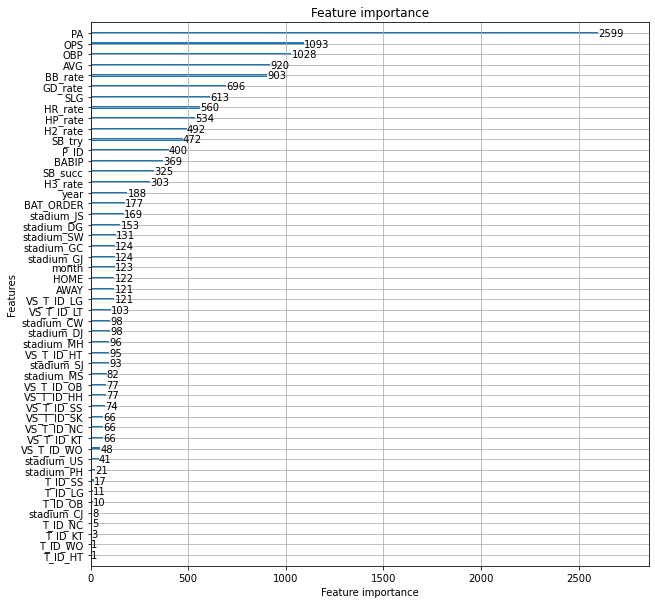

In [61]:
fit_lgb_b_imp = lgb.plot_importance(fit_lgb_b)
fit_lgb_b_imp.figure.set_size_inches(10,10)

# 타자의 XR 예측

In [62]:
batter_for_pred = pd.read_csv("./data/batter_for_pred.csv")

In [63]:
batter_for_pred =batter_for_pred.drop(columns="Unnamed: 0")

In [64]:
batter_for_pred = pd.get_dummies(batter_for_pred ,columns=["T_ID"])

In [65]:
list(X_train)

['year',
 'month',
 'P_ID',
 'PA',
 'BAT_ORDER',
 'stadium_MH',
 'stadium_MS',
 'stadium_JS',
 'stadium_SW',
 'stadium_DJ',
 'stadium_DG',
 'stadium_GJ',
 'stadium_GC',
 'stadium_SJ',
 'stadium_PH',
 'stadium_US',
 'stadium_CJ',
 'stadium_CW',
 'VS_T_ID_HH',
 'VS_T_ID_HT',
 'VS_T_ID_KT',
 'VS_T_ID_LG',
 'VS_T_ID_LT',
 'VS_T_ID_NC',
 'VS_T_ID_OB',
 'VS_T_ID_SK',
 'VS_T_ID_SS',
 'VS_T_ID_WO',
 'HOME',
 'AWAY',
 'SB_try',
 'SB_succ',
 'BABIP',
 'H2_rate',
 'H3_rate',
 'HR_rate',
 'BB_rate',
 'HP_rate',
 'GD_rate',
 'AVG',
 'OBP',
 'SLG',
 'OPS',
 'T_ID_HH',
 'T_ID_HT',
 'T_ID_KT',
 'T_ID_LG',
 'T_ID_LT',
 'T_ID_NC',
 'T_ID_OB',
 'T_ID_SK',
 'T_ID_SS',
 'T_ID_WO']

In [66]:
batter_for_pred = batter_for_pred[['year',
 'month',
 'P_ID',
 'PA',
 'BAT_ORDER',
 'stadium_MH',
 'stadium_MS',
 'stadium_JS',
 'stadium_SW',
 'stadium_DJ',
 'stadium_DG',
 'stadium_GJ',
 'stadium_GC',
 'stadium_SJ',
 'stadium_PH',
 'stadium_US',
 'stadium_CJ',
 'stadium_CW',
 'VS_T_ID_HH',
 'VS_T_ID_HT',
 'VS_T_ID_KT',
 'VS_T_ID_LG',
 'VS_T_ID_LT',
 'VS_T_ID_NC',
 'VS_T_ID_OB',
 'VS_T_ID_SK',
 'VS_T_ID_SS',
 'VS_T_ID_WO',
 'HOME',
 'AWAY',
 'SB_try',
 'SB_succ',
 'BABIP',
 'H2_rate',
 'H3_rate',
 'HR_rate',
 'BB_rate',
 'HP_rate',
 'GD_rate',
 'AVG',
 'OBP',
 'SLG',
 'OPS',
 'T_ID_HH',
 'T_ID_HT',
 'T_ID_KT',
 'T_ID_LG',
 'T_ID_LT',
 'T_ID_NC',
 'T_ID_OB',
 'T_ID_SK',
 'T_ID_SS',
 'T_ID_WO']]

In [67]:
batter_for_pred["T_ID_HH"] = batter_for_pred["T_ID_HH"].astype('category')
batter_for_pred["T_ID_HT"] = batter_for_pred["T_ID_HT"].astype('category')
batter_for_pred["T_ID_KT"] = batter_for_pred["T_ID_KT"].astype('category')
batter_for_pred["T_ID_LG"] = batter_for_pred["T_ID_LG"].astype('category')
batter_for_pred["T_ID_LT"] = batter_for_pred["T_ID_LT"].astype('category')
batter_for_pred["T_ID_NC"] = batter_for_pred["T_ID_NC"].astype('category')
batter_for_pred["T_ID_OB"] = batter_for_pred["T_ID_OB"].astype('category')
batter_for_pred["T_ID_SK"] = batter_for_pred["T_ID_SK"].astype('category')
batter_for_pred["T_ID_SS"] = batter_for_pred["T_ID_SS"].astype('category')
batter_for_pred["T_ID_WO"] = batter_for_pred["T_ID_WO"].astype('category')
batter_for_pred["P_ID"] = batter_for_pred["P_ID"].astype('category')
batter_for_pred["BAT_ORDER"] = batter_for_pred["BAT_ORDER"].astype('category')

In [73]:
pred = fit_lgb_b.predict(batter_for_pred)

ValueError: train and valid dataset categorical_feature do not match.

# 투수

In [28]:
pitcher = pd.read_csv("data/pitcher_feature_selection.csv")

In [29]:
pitcher = pd.get_dummies(pitcher,columns=["T_ID"])

In [30]:
pitcher.head()

,Unnamed: 0,year,month,P_ID,PA,R,stadium_MH,stadium_MS,stadium_JS,stadium_SW,...,T_ID_HH,T_ID_HT,T_ID_KT,T_ID_LG,T_ID_LT,T_ID_NC,T_ID_OB,T_ID_SK,T_ID_SS,T_ID_WO
0,1,2016,4,60146,45,7,3,0,10,0,...,0,0,0,1,0,0,0,0,0,0
1,2,2016,4,60181,28,4,3,0,10,0,...,0,0,0,1,0,0,0,0,0,0
2,3,2016,4,60263,98,7,3,9,6,0,...,0,0,0,0,0,1,0,0,0,0
3,4,2016,4,60264,88,7,3,0,2,14,...,0,0,1,0,0,0,0,0,0,0
4,5,2016,4,60339,21,1,3,2,3,0,...,0,0,0,0,0,0,0,0,0,1


In [31]:
x = pitcher.drop(["R","Unnamed: 0","ERR"], axis = 1)
y = pitcher["R"]

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=99)

In [32]:
x.head()

,year,month,P_ID,PA,stadium_MH,stadium_MS,stadium_JS,stadium_SW,stadium_DJ,stadium_DG,...,T_ID_HH,T_ID_HT,T_ID_KT,T_ID_LG,T_ID_LT,T_ID_NC,T_ID_OB,T_ID_SK,T_ID_SS,T_ID_WO
0,2016,4,60146,45,3,0,10,0,2,2,...,0,0,0,1,0,0,0,0,0,0
1,2016,4,60181,28,3,0,10,0,2,2,...,0,0,0,1,0,0,0,0,0,0
2,2016,4,60263,98,3,9,6,0,0,3,...,0,0,0,0,0,1,0,0,0,0
3,2016,4,60264,88,3,0,2,14,0,3,...,0,0,1,0,0,0,0,0,0,0
4,2016,4,60339,21,3,2,3,0,3,0,...,0,0,0,0,0,0,0,0,0,1


In [33]:
x["T_ID_HH"] = x["T_ID_HH"].astype('category')
x["T_ID_HT"] = x["T_ID_HT"].astype('category')
x["T_ID_KT"] = x["T_ID_KT"].astype('category')
x["T_ID_LG"] = x["T_ID_LG"].astype('category')
x["T_ID_LT"] = x["T_ID_LT"].astype('category')
x["T_ID_NC"] = x["T_ID_NC"].astype('category')
x["T_ID_OB"] = x["T_ID_OB"].astype('category')
x["T_ID_SK"] = x["T_ID_SK"].astype('category')
x["T_ID_SS"] = x["T_ID_SS"].astype('category')
x["T_ID_WO"] = x["T_ID_WO"].astype('category')
x["P_ID"] = x["P_ID"].astype('category')

# 투수 튜닝 x

In [34]:
lgb_p = lgb.LGBMRegressor()

In [35]:
lgb_p.fit(x_train,y_train)

LGBMRegressor()

In [36]:
y_pred = lgb_p.predict(x_test)

In [37]:
y_pred = np.where(y_pred<0,0,y_pred)

In [38]:
print(mean_squared_error(y_test, y_pred))

0.29170839286814015


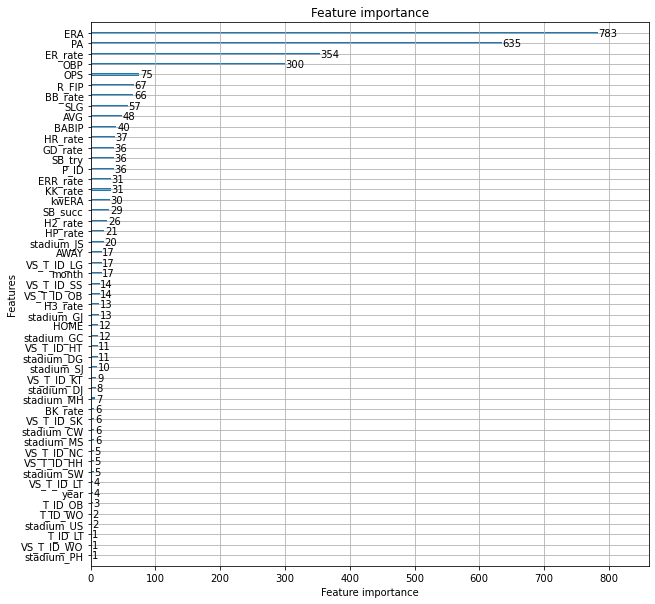

In [39]:
lgb_p_imp = lgb.plot_importance(lgb_p)
lgb_p_imp.figure.set_size_inches(10,10)

# 투수 튜닝

In [40]:
def LGB_cv(max_depth,learning_rate,n_estimators):
    model = lgb.LGBMRegressor(max_depth=int(max_depth),
                            learning_rate=learning_rate,
                            n_estimators=int(n_estimators),
                             )
    NMSE = cross_val_score(model, x_train, y_train, scoring='neg_mean_squared_error', cv=5).mean()
    return NMSE

In [41]:
pbounds = {'max_depth': (2, 15),
          'learning_rate': (0.001, 0.2),
          'n_estimators' :(50,3000),
          }

In [42]:
from bayes_opt import BayesianOptimization
lgbmBO = BayesianOptimization(f = LGB_cv,pbounds = pbounds, verbose = 2, random_state = 99 )

In [43]:
lgbmBO.maximize(init_points=10, n_iter = 200)

|   iter    |  target   | learni... | max_depth | n_esti... |
-------------------------------------------------------------
[LightGBM] [Warning] Accuracy may be bad since you didn't set num_leaves and 2^max_depth > num_leaves
[LightGBM] [Warning] Accuracy may be bad since you didn't set num_leaves and 2^max_depth > num_leaves
[LightGBM] [Warning] Accuracy may be bad since you didn't set num_leaves and 2^max_depth > num_leaves
[LightGBM] [Warning] Accuracy may be bad since you didn't set num_leaves and 2^max_depth > num_leaves
[LightGBM] [Warning] Accuracy may be bad since you didn't set num_leaves and 2^max_depth > num_leaves
|  1        | -0.4028   |  0.1348   |  8.345    |  2.485e+0 |
[LightGBM] [Warning] Accuracy may be bad since you didn't set num_leaves and 2^max_depth > num_leaves
[LightGBM] [Warning] Accuracy may be bad since you didn't set num_leaves and 2^max_depth > num_leaves
[LightGBM] [Warning] Accuracy may be bad since you didn't set num_leaves and 2^max_depth > num_leave

[LightGBM] [Warning] Accuracy may be bad since you didn't set num_leaves and 2^max_depth > num_leaves
[LightGBM] [Warning] Accuracy may be bad since you didn't set num_leaves and 2^max_depth > num_leaves
[LightGBM] [Warning] Accuracy may be bad since you didn't set num_leaves and 2^max_depth > num_leaves
|  18       | -0.3896   |  0.1143   |  7.281    |  301.7    |
|  19       | -1.604    |  0.1049   |  2.348    |  60.47    |
|  20       | -0.2838   |  0.06966  |  3.784    |  2.934e+0 |
|  21       | -0.3461   |  0.02117  |  4.763    |  2.976e+0 |
[LightGBM] [Warning] Accuracy may be bad since you didn't set num_leaves and 2^max_depth > num_leaves
[LightGBM] [Warning] Accuracy may be bad since you didn't set num_leaves and 2^max_depth > num_leaves
[LightGBM] [Warning] Accuracy may be bad since you didn't set num_leaves and 2^max_depth > num_leaves
[LightGBM] [Warning] Accuracy may be bad since you didn't set num_leaves and 2^max_depth > num_leaves
[LightGBM] [Warning] Accuracy may be b

[LightGBM] [Warning] Accuracy may be bad since you didn't set num_leaves and 2^max_depth > num_leaves
[LightGBM] [Warning] Accuracy may be bad since you didn't set num_leaves and 2^max_depth > num_leaves
[LightGBM] [Warning] Accuracy may be bad since you didn't set num_leaves and 2^max_depth > num_leaves
[LightGBM] [Warning] Accuracy may be bad since you didn't set num_leaves and 2^max_depth > num_leaves
|  40       | -0.3646   |  0.0147   |  8.53     |  2.981e+0 |
|  41       | -0.346    |  0.1037   |  4.239    |  2.986e+0 |
[LightGBM] [Warning] Accuracy may be bad since you didn't set num_leaves and 2^max_depth > num_leaves
[LightGBM] [Warning] Accuracy may be bad since you didn't set num_leaves and 2^max_depth > num_leaves
[LightGBM] [Warning] Accuracy may be bad since you didn't set num_leaves and 2^max_depth > num_leaves
[LightGBM] [Warning] Accuracy may be bad since you didn't set num_leaves and 2^max_depth > num_leaves
[LightGBM] [Warning] Accuracy may be bad since you didn't se

[LightGBM] [Warning] Accuracy may be bad since you didn't set num_leaves and 2^max_depth > num_leaves
[LightGBM] [Warning] Accuracy may be bad since you didn't set num_leaves and 2^max_depth > num_leaves
[LightGBM] [Warning] Accuracy may be bad since you didn't set num_leaves and 2^max_depth > num_leaves
[LightGBM] [Warning] Accuracy may be bad since you didn't set num_leaves and 2^max_depth > num_leaves
|  61       | -0.3897   |  0.1471   |  12.59    |  1.711e+0 |
|  62       | -0.3068   |  0.1522   |  2.322    |  2.916e+0 |
|  63       | -0.381    |  0.1745   |  4.698    |  2.911e+0 |
|  64       | -0.4082   |  0.03368  |  2.096    |  1.709e+0 |
|  65       | -0.2992   |  0.1042   |  3.358    |  996.2    |
[LightGBM] [Warning] Accuracy may be bad since you didn't set num_leaves and 2^max_depth > num_leaves
[LightGBM] [Warning] Accuracy may be bad since you didn't set num_leaves and 2^max_depth > num_leaves
[LightGBM] [Warning] Accuracy may be bad since you didn't set num_leaves and 2

[LightGBM] [Warning] Accuracy may be bad since you didn't set num_leaves and 2^max_depth > num_leaves
[LightGBM] [Warning] Accuracy may be bad since you didn't set num_leaves and 2^max_depth > num_leaves
[LightGBM] [Warning] Accuracy may be bad since you didn't set num_leaves and 2^max_depth > num_leaves
[LightGBM] [Warning] Accuracy may be bad since you didn't set num_leaves and 2^max_depth > num_leaves
|  82       | -0.3978   |  0.1345   |  9.248    |  2.171e+0 |
[LightGBM] [Warning] Accuracy may be bad since you didn't set num_leaves and 2^max_depth > num_leaves
[LightGBM] [Warning] Accuracy may be bad since you didn't set num_leaves and 2^max_depth > num_leaves
[LightGBM] [Warning] Accuracy may be bad since you didn't set num_leaves and 2^max_depth > num_leaves
[LightGBM] [Warning] Accuracy may be bad since you didn't set num_leaves and 2^max_depth > num_leaves
[LightGBM] [Warning] Accuracy may be bad since you didn't set num_leaves and 2^max_depth > num_leaves
|  83       | -0.385

|  104      | -15.26    |  0.001    |  2.0      |  625.8    |
[LightGBM] [Warning] Accuracy may be bad since you didn't set num_leaves and 2^max_depth > num_leaves
[LightGBM] [Warning] Accuracy may be bad since you didn't set num_leaves and 2^max_depth > num_leaves
[LightGBM] [Warning] Accuracy may be bad since you didn't set num_leaves and 2^max_depth > num_leaves
[LightGBM] [Warning] Accuracy may be bad since you didn't set num_leaves and 2^max_depth > num_leaves
[LightGBM] [Warning] Accuracy may be bad since you didn't set num_leaves and 2^max_depth > num_leaves
|  105      | -0.4144   |  0.1926   |  13.95    |  878.6    |
[LightGBM] [Warning] Accuracy may be bad since you didn't set num_leaves and 2^max_depth > num_leaves
[LightGBM] [Warning] Accuracy may be bad since you didn't set num_leaves and 2^max_depth > num_leaves
[LightGBM] [Warning] Accuracy may be bad since you didn't set num_leaves and 2^max_depth > num_leaves
[LightGBM] [Warning] Accuracy may be bad since you didn't se

[LightGBM] [Warning] Accuracy may be bad since you didn't set num_leaves and 2^max_depth > num_leaves
|  121      | -11.63    |  0.001    |  15.0     |  572.3    |
|  122      | -0.3859   |  0.132    |  2.634    |  535.5    |
[LightGBM] [Warning] Accuracy may be bad since you didn't set num_leaves and 2^max_depth > num_leaves
[LightGBM] [Warning] Accuracy may be bad since you didn't set num_leaves and 2^max_depth > num_leaves
[LightGBM] [Warning] Accuracy may be bad since you didn't set num_leaves and 2^max_depth > num_leaves
[LightGBM] [Warning] Accuracy may be bad since you didn't set num_leaves and 2^max_depth > num_leaves
[LightGBM] [Warning] Accuracy may be bad since you didn't set num_leaves and 2^max_depth > num_leaves
|  123      | -0.5396   |  0.01103  |  13.9     |  366.3    |
|  124      | -0.2983   |  0.08929  |  2.169    |  2.75e+03 |
[LightGBM] [Warning] Accuracy may be bad since you didn't set num_leaves and 2^max_depth > num_leaves
[LightGBM] [Warning] Accuracy may be b

|  141      | -0.2961   |  0.1259   |  3.025    |  1.981e+0 |
|  142      | -0.4929   |  0.04444  |  2.36     |  777.5    |
[LightGBM] [Warning] Accuracy may be bad since you didn't set num_leaves and 2^max_depth > num_leaves
[LightGBM] [Warning] Accuracy may be bad since you didn't set num_leaves and 2^max_depth > num_leaves
[LightGBM] [Warning] Accuracy may be bad since you didn't set num_leaves and 2^max_depth > num_leaves
[LightGBM] [Warning] Accuracy may be bad since you didn't set num_leaves and 2^max_depth > num_leaves
[LightGBM] [Warning] Accuracy may be bad since you didn't set num_leaves and 2^max_depth > num_leaves
|  143      | -0.3623   |  0.01088  |  14.91    |  2.197e+0 |
[LightGBM] [Warning] Accuracy may be bad since you didn't set num_leaves and 2^max_depth > num_leaves
[LightGBM] [Warning] Accuracy may be bad since you didn't set num_leaves and 2^max_depth > num_leaves
[LightGBM] [Warning] Accuracy may be bad since you didn't set num_leaves and 2^max_depth > num_leave

|  167      | -0.321    |  0.06464  |  2.182    |  2.316e+0 |
[LightGBM] [Warning] Accuracy may be bad since you didn't set num_leaves and 2^max_depth > num_leaves
[LightGBM] [Warning] Accuracy may be bad since you didn't set num_leaves and 2^max_depth > num_leaves
[LightGBM] [Warning] Accuracy may be bad since you didn't set num_leaves and 2^max_depth > num_leaves
[LightGBM] [Warning] Accuracy may be bad since you didn't set num_leaves and 2^max_depth > num_leaves
[LightGBM] [Warning] Accuracy may be bad since you didn't set num_leaves and 2^max_depth > num_leaves
|  168      | -0.3833   |  0.1059   |  14.51    |  2.126e+0 |
|  169      | -0.365    |  0.2      |  2.0      |  710.2    |
[LightGBM] [Warning] Accuracy may be bad since you didn't set num_leaves and 2^max_depth > num_leaves
[LightGBM] [Warning] Accuracy may be bad since you didn't set num_leaves and 2^max_depth > num_leaves
[LightGBM] [Warning] Accuracy may be bad since you didn't set num_leaves and 2^max_depth > num_leave

[LightGBM] [Warning] Accuracy may be bad since you didn't set num_leaves and 2^max_depth > num_leaves
[LightGBM] [Warning] Accuracy may be bad since you didn't set num_leaves and 2^max_depth > num_leaves
|  195      | -0.3882   |  0.1582   |  14.96    |  2.652e+0 |
|  196      | -0.3417   |  0.07398  |  2.022    |  1.468e+0 |
|  197      | -0.4311   |  0.1702   |  2.06     |  355.2    |
|  198      | -0.2977   |  0.1204   |  2.011    |  2.393e+0 |
|  199      | -0.3299   |  0.2      |  2.0      |  1.685e+0 |
[LightGBM] [Warning] Accuracy may be bad since you didn't set num_leaves and 2^max_depth > num_leaves
[LightGBM] [Warning] Accuracy may be bad since you didn't set num_leaves and 2^max_depth > num_leaves
[LightGBM] [Warning] Accuracy may be bad since you didn't set num_leaves and 2^max_depth > num_leaves
[LightGBM] [Warning] Accuracy may be bad since you didn't set num_leaves and 2^max_depth > num_leaves
[LightGBM] [Warning] Accuracy may be bad since you didn't set num_leaves and 2

In [44]:
fit_lgb_p = lgb.LGBMRegressor(max_depth= int( lgbmBO.max['params']['max_depth'] ),
                             learning_rate=lgbmBO.max['params']['learning_rate'],
                             n_estimators=int(lgbmBO.max['params']['n_estimators']),
                            )

In [45]:
fit_lgb_p.fit(x_train,y_train)

LGBMRegressor(learning_rate=0.060288989690154456, max_depth=3,
              n_estimators=2982)

In [46]:
y_pred = fit_lgb_p.predict(x_test)

In [47]:
y_pred = np.where(y_pred<0,0,y_pred)

In [48]:
print(mean_squared_error(y_test, y_pred))

0.201885321114023


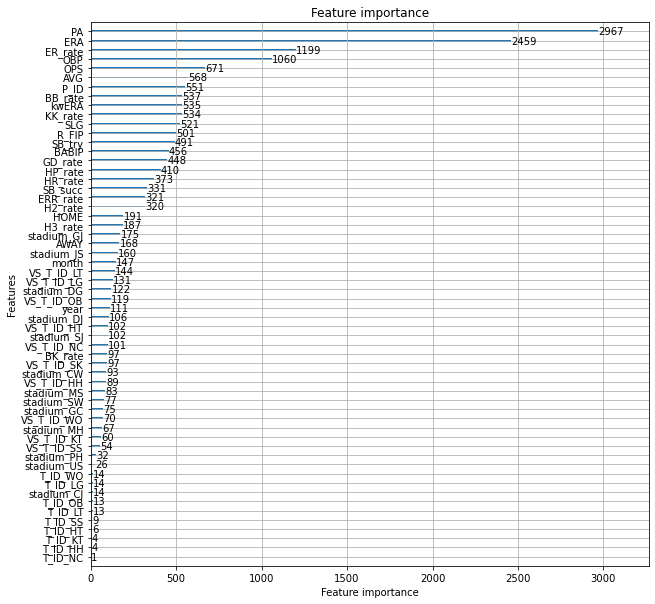

In [49]:
fit_lgb_p_imp = lgb.plot_importance(fit_lgb_p)
fit_lgb_p_imp.figure.set_size_inches(10,10)

# 투수의 R 예측

In [77]:
pitcher_for_pred = pd.read_csv("./data/pitcher_for_pred.csv")

In [78]:
pitcher_for_pred = pd.DataFrame(pitcher_for_pred)

In [79]:
pitcher_for_pred = pitcher_for_pred.drop(columns="Unnamed: 0")

In [80]:
pitcher_for_pred = pd.get_dummies(pitcher_for_pred ,columns=["T_ID"])

In [85]:
list(x_train)

['year',
 'month',
 'P_ID',
 'PA',
 'stadium_MH',
 'stadium_MS',
 'stadium_JS',
 'stadium_SW',
 'stadium_DJ',
 'stadium_DG',
 'stadium_GJ',
 'stadium_GC',
 'stadium_SJ',
 'stadium_PH',
 'stadium_US',
 'stadium_CJ',
 'stadium_CW',
 'VS_T_ID_HH',
 'VS_T_ID_HT',
 'VS_T_ID_KT',
 'VS_T_ID_LG',
 'VS_T_ID_LT',
 'VS_T_ID_NC',
 'VS_T_ID_OB',
 'VS_T_ID_SK',
 'VS_T_ID_SS',
 'VS_T_ID_WO',
 'HOME',
 'AWAY',
 'BABIP',
 'ERA',
 'R_FIP',
 'kwERA',
 'SB_try',
 'SB_succ',
 'GD_rate',
 'H2_rate',
 'H3_rate',
 'HR_rate',
 'BB_rate',
 'HP_rate',
 'KK_rate',
 'BK_rate',
 'AVG',
 'OBP',
 'SLG',
 'OPS',
 'ER_rate',
 'ERR_rate',
 'T_ID_HH',
 'T_ID_HT',
 'T_ID_KT',
 'T_ID_LG',
 'T_ID_LT',
 'T_ID_NC',
 'T_ID_OB',
 'T_ID_SK',
 'T_ID_SS',
 'T_ID_WO']

In [86]:
pitcher_for_pred = pitcher_for_pred[['year',
 'month',
 'P_ID',
 'PA',
 'stadium_MH',
 'stadium_MS',
 'stadium_JS',
 'stadium_SW',
 'stadium_DJ',
 'stadium_DG',
 'stadium_GJ',
 'stadium_GC',
 'stadium_SJ',
 'stadium_PH',
 'stadium_US',
 'stadium_CJ',
 'stadium_CW',
 'VS_T_ID_HH',
 'VS_T_ID_HT',
 'VS_T_ID_KT',
 'VS_T_ID_LG',
 'VS_T_ID_LT',
 'VS_T_ID_NC',
 'VS_T_ID_OB',
 'VS_T_ID_SK',
 'VS_T_ID_SS',
 'VS_T_ID_WO',
 'HOME',
 'AWAY',
 'BABIP',
 'ERA',
 'R_FIP',
 'kwERA',
 'SB_try',
 'SB_succ',
 'GD_rate',
 'H2_rate',
 'H3_rate',
 'HR_rate',
 'BB_rate',
 'HP_rate',
 'KK_rate',
 'BK_rate',
 'AVG',
 'OBP',
 'SLG',
 'OPS',
 'ER_rate',
 'ERR_rate',
 'T_ID_HH',
 'T_ID_HT',
 'T_ID_KT',
 'T_ID_LG',
 'T_ID_LT',
 'T_ID_NC',
 'T_ID_OB',
 'T_ID_SK',
 'T_ID_SS',
 'T_ID_WO']]

KeyError: "['ERA', 'R_FIP', 'ERR_rate'] not in index"

In [65]:
pitcher_for_pred["T_ID_HH"] = pitcher_for_pred["T_ID_HH"].astype('category')
pitcher_for_pred["T_ID_HT"] = pitcher_for_pred["T_ID_HT"].astype('category')
pitcher_for_pred["T_ID_KT"] = pitcher_for_pred["T_ID_KT"].astype('category')
pitcher_for_pred["T_ID_LG"] = pitcher_for_pred["T_ID_LG"].astype('category')
pitcher_for_pred["T_ID_LT"] = pitcher_for_pred["T_ID_LT"].astype('category')
pitcher_for_pred["T_ID_NC"] = pitcher_for_pred["T_ID_NC"].astype('category')
pitcher_for_pred["T_ID_OB"] = pitcher_for_pred["T_ID_OB"].astype('category')
pitcher_for_pred["T_ID_SK"] = pitcher_for_pred["T_ID_SK"].astype('category')
pitcher_for_pred["T_ID_SS"] = pitcher_for_pred["T_ID_SS"].astype('category')
pitcher_for_pred["T_ID_WO"] = pitcher_for_pred["T_ID_WO"].astype('category')
pitcher_for_pred["P_ID"] = pitcher_for_pred["P_ID"].astype('category')